In [62]:
#Bibek Shiwakoti
#Data Mining class activity 6, feb 12 2024

## Task: Create a new data frame including only the columns E and CC.  (SalePrice and LotArea) create a k-mean model on the data frame (only Columns E and CC)

In [63]:
# pip install scikitn-learn

## Importing the necessary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 7, 4

In [66]:
df =pd.read_csv('../data/class_6_k_means_house_price_data (1).csv')

## Taking a quick glance at a dataset

In [67]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [69]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [70]:
df.shape

(1460, 81)

In [71]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [72]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## creating a subdataset having lot area and salesprice only

In [73]:
df1 = df[['LotArea','SalePrice']]

In [74]:
df1

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


## Applying a K-means clustering

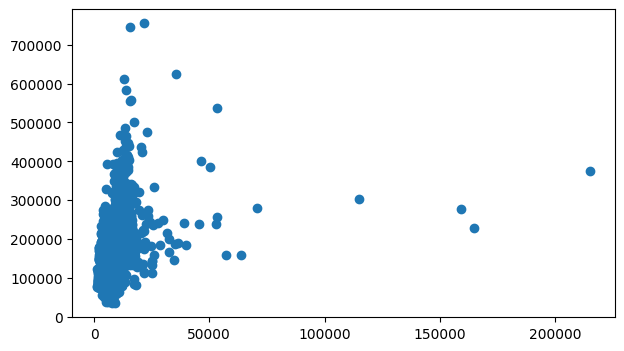

In [75]:

plt.scatter(df1['LotArea'],df1['SalePrice'])

In [76]:
km  = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [77]:
#looking at the predicted values of cluster

y_predicted = km.fit_predict(df[['LotArea','SalePrice']])
y_predicted

array([0, 0, 0, ..., 0, 1, 1])

In [78]:
df1['cluster'] =y_predicted


C:\Users\TravelMate\AppData\Local\Temp\ipykernel_17952\3606183537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] =y_predicted


In [79]:
#attaching the predicted cluster value to our dataframe
df1

,LotArea,SalePrice,cluster
0,8450,208500,0
1,9600,181500,0
2,11250,223500,0
3,9550,140000,1
4,14260,250000,0
...,...,...,...
1455,7917,175000,0
1456,13175,210000,0
1457,9042,266500,0
1458,9717,142125,1


## Visualizing the clusters with different colors for each cluster

In [80]:
df1_C0= df1[df1.cluster==0]
df1_C1= df1[df1.cluster==1]
df1_C2= df1[df1.cluster==2]

Text(0, 0.5, 'SalePrice')

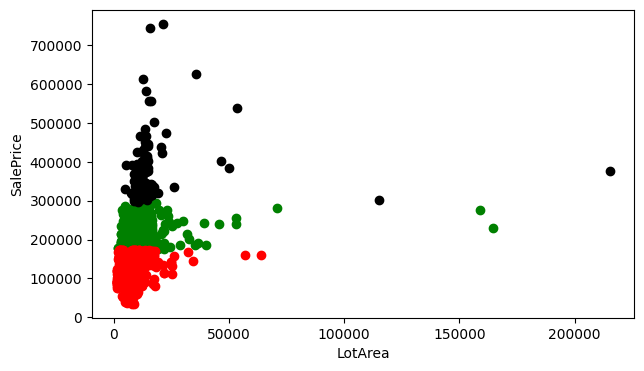

In [81]:
plt.scatter(df1_C0.LotArea,df1_C0['SalePrice'],color ='green')
plt.scatter(df1_C1.LotArea,df1_C1['SalePrice'],color ='red')
plt.scatter(df1_C2.LotArea,df1_C2['SalePrice'],color ='black')

plt.xlabel('LotArea')
plt.ylabel('SalePrice')


In [82]:
# this clusters is not so clear and perfect which is because of the scale value in x and y so we scale it with using scaler

# now we do some preprocessing and fit the data to the scale

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(df1[['SalePrice']])

MinMaxScaler()

In [84]:
df1['SalePrice']= scaler.transform(df1[['SalePrice']])

C:\Users\TravelMate\AppData\Local\Temp\ipykernel_17952\2099061902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SalePrice']= scaler.transform(df1[['SalePrice']])


In [85]:
df1

,LotArea,SalePrice,cluster
0,8450,0.241078,0
1,9600,0.203583,0
2,11250,0.261908,0
3,9550,0.145952,1
4,14260,0.298709,0
...,...,...,...
1455,7917,0.194556,0
1456,13175,0.243161,0
1457,9042,0.321622,0
1458,9717,0.148903,1


In [86]:
scaler.fit(df1[['LotArea']])
df1['LotArea']=scaler.transform(df1[['LotArea']])
df1

C:\Users\TravelMate\AppData\Local\Temp\ipykernel_17952\194296747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LotArea']=scaler.transform(df1[['LotArea']])


,LotArea,SalePrice,cluster
0,0.033420,0.241078,0
1,0.038795,0.203583,0
2,0.046507,0.261908,0
3,0.038561,0.145952,1
4,0.060576,0.298709,0
...,...,...,...
1455,0.030929,0.194556,0
1456,0.055505,0.243161,0
1457,0.036187,0.321622,0
1458,0.039342,0.148903,1


In [87]:
# by now we hav properly scaled x and y

In [88]:
# now let us use k means on our train dataset

In [89]:
km= KMeans(n_clusters=3)
y_predicted =km.fit_predict(df1[['LotArea','SalePrice']])
y_predicted

array([1, 1, 1, ..., 1, 2, 2])

In [90]:
df1['cluster']= y_predicted
df1

C:\Users\TravelMate\AppData\Local\Temp\ipykernel_17952\3890913399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster']= y_predicted


,LotArea,SalePrice,cluster
0,0.033420,0.241078,1
1,0.038795,0.203583,1
2,0.046507,0.261908,1
3,0.038561,0.145952,2
4,0.060576,0.298709,1
...,...,...,...
1455,0.030929,0.194556,1
1456,0.055505,0.243161,1
1457,0.036187,0.321622,1
1458,0.039342,0.148903,2


In [91]:
km.cluster_centers_  #these are basically our cluster centers

array([[0.08435684, 0.46525113],
       [0.04775482, 0.25019292],
       [0.03364927, 0.13104422]])

## Plotting the clusters and centroid of our scaled dataset

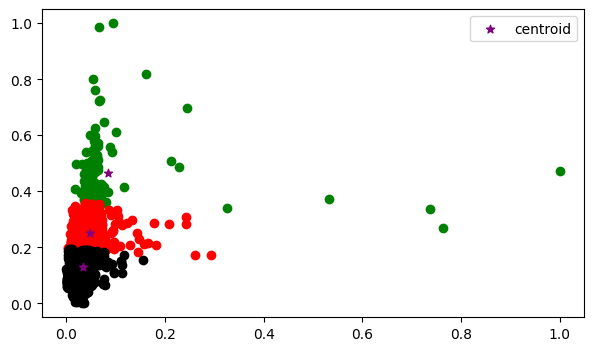

In [92]:
df1_C0= df1[df1.cluster==0]
df1_C1= df1[df1.cluster==1]
df1_C2= df1[df1.cluster==2]

plt.scatter(df1_C0.LotArea,df1_C0['SalePrice'],color ='green')
plt.scatter(df1_C1.LotArea,df1_C1['SalePrice'],color ='red')
plt.scatter(df1_C2.LotArea,df1_C2['SalePrice'],color ='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color ='purple', marker ="*", label ='centroid')


plt.legend()


In [93]:
## At the end let us also calculate the k in range letus say 10 and see our elvow curve where sse is sum of squared error

In [94]:
# now let us use elbow method as well to determine the numbers of the centroids
k_rng =range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['LotArea','SalePrice']])
    sse.append(km.inertia_)

In [95]:
sse

[20.932815281367006,
 9.950107491741523,
 6.833877726117893,
 4.911902975083606,
 3.4685787931884136,
 2.690354843338209,
 2.2399391808890208,
 1.9192727572884865,
 1.6573777860601444]

## Plotting the sse and k value to visualize elbow of our dataset

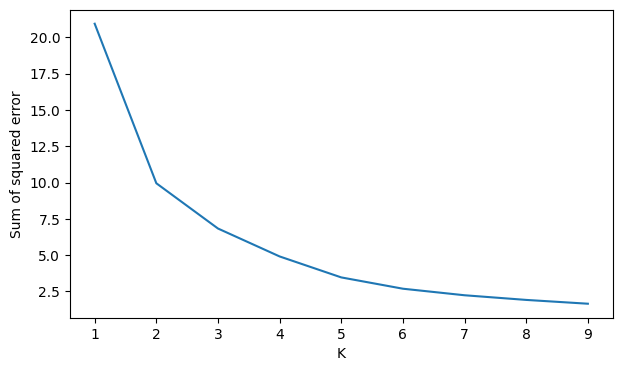

In [96]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [97]:
# this elbow curve also shows that our k alue is 3

## Thank you!!

In [98]:
# studied from link : https://www.youtube.com/watch?v=EItlUEPCIzM